In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [5]:
def plot_radar(r, ax=None, fill=True, figsize=(6,6), **kwargs):
    """plot a radar 
    Inputs: r, list like"""
    
    if ax==None:
        fig, ax = plt.subplots(1,1,figsize=figsize, subplot_kw={'projection': 'polar'} )
    
    r = list(r)
    N = len(r)
    r.append( r[0] )  # repeat first to close circle

    # get angle for each value
    theta = [n * 2 * np.pi / N  for n in range(N) ]
    theta.append( theta[0] )
    
    ax.plot(theta, r, **kwargs)
    if fill:
        ax.fill(theta, r, alpha=0.1)
    ax.set_xticks(theta[:-1], );
    #ax.set_xticklabels( ['v1', 'v2'] );
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    return ax
    


In [6]:
def show_opsims(dbDir):
    '''Show available opsim databases in the provided directory.

    Args:
        dbDir(str): The path the database directory.
    '''

    dbDir = os.path.abspath(dbDir)
    db_list = glob.glob(dbDir+'/*.db')
    runNames = [os.path.splitext(os.path.basename(x))[0] for x in db_list]

    return runNames


In [7]:
def scale(arr, mode=0):
    """scale array by max or scale to 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [8]:
# name of opsims
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases


# v1.5  86
# v1.6  30 
# v1.7 74

runNames = show_opsims(dbpath)

runNames.sort()

In [7]:
# prepare proper motion dataframe from scores

#df_score_CI = pd.read_csv('./data/Score_CI.csv', skiprows=1, names=['score_CI'])
#df_score_LS = pd.read_csv('./data/Score_LS.csv', skiprows=1, names=['score_LS'])
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', skiprows=1, names=['score_PMT'])

#df_score_CI = pd.read_csv('./data/Score_CI.csv', index_col=0)
#df_score_LS = pd.read_csv('./data/Score_LS.csv', index_col=0)
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', index_col=0)

#df_properMotion = pd.DataFrame()

#df_properMotion['db'] = runNames
#df_properMotion['db'] = df_score_CI.db
#df_properMotion['FoM_CI'] = df_score_CI.fom
#df_properMotion['FoM_LS'] = df_score_LS.fom
#df_properMotion['FoM_PMT'] = df_score_PMT.fom

#df_properMotion.sort_values(by='db', inplace=True)
#df_properMotion.to_csv('./data/df_properMotion.csv', index=False)

In [9]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']

#cols_pm = ['FoM_CI', 'FoM_LS', 'FoM_PMT']

In [43]:
df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_wfd.csv')
df_nfields = pd.read_csv('./data_v1_5/df_Nfields_wfd.csv')
df_nstars = pd.read_csv('./data_v1_5/df_Nstars_wfd.csv')
df_depth = pd.read_csv('./data_v1_5/df_depth_wfd.csv')


#df_tgaps = pd.read_csv('./data_v1_5/df_tgapsFoM_all_noddf.csv')
#df_nfields = pd.read_csv('./data_v1_5/df_Nfields_all.csv')
#df_nstars = pd.read_csv('./data_v1_5/df_Nstars_all.csv')
#df_depth = pd.read_csv('./data_v1_5/df_depth_all.csv')



In [44]:
# normalize
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_tgaps[col] = scale(df_tgaps[col])
    df_nfields[col] = scale(df_nfields[col])
    df_nstars[col] = scale(df_nstars[col])

for col in filters:
    df_depth[col] = scale(df_depth[col], mode=1)

df_tgaps['total_same'] = scale( np.sum(df_tgaps[ cols_same ], axis=1) )
df_tgaps['total_diff'] = scale( np.sum(df_tgaps[ cols_diff ], axis=1) )
df_nfields['total'] = scale( np.sum(df_nfields[ cols_all ], axis=1) )
df_nstars['total'] = scale( np.sum(df_nstars[ cols_all ], axis=1) )
df_depth['total'] = scale( np.sum(df_depth[ filters ], axis=1) )


In [45]:
df_radar = pd.DataFrame()
df_radar['db'] = runNames

df_radar['FoM_tgaps_same'] = df_tgaps['total_same'] 
df_radar['FoM_tgaps_diff'] = df_tgaps['total_diff'] 

df_radar['FoM_EG'] = df_nfields['total']
df_radar['FoM_Gal'] = df_nstars['total']
df_radar['FoM_depth'] = df_depth['total']
df_radar['family'] = df_radar.apply(get_family, axis=1)
df_radar.to_csv('./data_v1_5/df_radar_wfd.csv', index=False)

In [15]:
#df_radar = pd.read_csv('./data/df_radar.csv')

In [16]:
df_radar.head()

,db,FoM_tgaps_same,FoM_tgaps_diff,FoM_EG,FoM_Gal,FoM_depth,family
0,agnddf_v1.5_10yrs,0.145183,0.526600,0.544217,0.202758,0.943507,agnddf
1,alt_dust_v1.5_10yrs,0.152272,0.751096,0.565258,0.164858,0.865168,alt
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.157885,0.850064,0.657932,0.162007,0.810365,alt
3,baseline_2snaps_v1.5_10yrs,0.139289,0.484341,0.326307,0.138447,0.900398,baseline
4,baseline_samefilt_v1.5_10yrs,0.206147,0.207056,0.347804,0.125631,0.908902,baseline


In [ ]:
def replace_dot(df):
    """replace . in dbname for d3js"""
    

def get_df_radar_d3js(df_radar):
    
    

In [37]:
# prepare data for d3js
# transpose, remove family, replace dot in 'db' to _, 
#df_radar.set_index('db').T.to_csv("data_v1_5/df_radar_all_t.csv")
df_radar.set_index('db').T.reset_index().rename(columns={'index':'section'})

db,section,agnddf_v1.5_10yrs,alt_dust_v1.5_10yrs,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,baseline_2snaps_v1.5_10yrs,baseline_samefilt_v1.5_10yrs,baseline_v1.5_10yrs,bulges_bs_v1.5_10yrs,bulges_bulge_wfd_v1.5_10yrs,bulges_cadence_bs_v1.5_10yrs,...,wfd_depth_scale0.80_noddf_v1.5_10yrs,wfd_depth_scale0.80_v1.5_10yrs,wfd_depth_scale0.85_noddf_v1.5_10yrs,wfd_depth_scale0.85_v1.5_10yrs,wfd_depth_scale0.90_noddf_v1.5_10yrs,wfd_depth_scale0.90_v1.5_10yrs,wfd_depth_scale0.95_noddf_v1.5_10yrs,wfd_depth_scale0.95_v1.5_10yrs,wfd_depth_scale0.99_noddf_v1.5_10yrs,wfd_depth_scale0.99_v1.5_10yrs
0,FoM_tgaps_same,0.145183,0.152272,0.157885,0.139289,0.206147,0.147171,0.149083,0.15556,0.151756,...,0.171745,0.159968,0.166419,0.166359,0.164543,0.153754,0.143278,0.153079,0.144043,0.142752
1,FoM_tgaps_diff,0.5266,0.751096,0.850064,0.484341,0.207056,0.565111,0.507733,0.501281,0.513747,...,0.587476,0.529814,0.597009,0.534009,0.603656,0.547139,0.613169,0.553414,0.645371,0.590341
2,FoM_EG,0.544217,0.565258,0.657932,0.326307,0.347804,0.614759,0.31421,0.311457,0.322413,...,0.572756,0.397999,0.691421,0.468492,0.778834,0.586379,0.847949,0.71201,0.899864,0.799711
3,FoM_Gal,0.202758,0.164858,0.162007,0.138447,0.125631,0.236688,0.12959,0.232925,0.124565,...,0.310177,0.226147,0.316443,0.214624,0.299285,0.252339,0.277107,0.276103,0.290032,0.272332
4,FoM_depth,0.943507,0.865168,0.810365,0.900398,0.908902,0.941978,0.87892,0.880375,0.874915,...,0.928871,0.916101,0.939683,0.9285,0.947199,0.938674,0.962802,0.947993,0.970859,0.957645
5,family,agnddf,alt,alt,baseline,baseline,baseline,bulges,bulges,bulges,...,wfd,wfd,wfd,wfd,wfd,wfd,wfd,wfd,wfd,wfd


In [17]:
df_radar.sort_values(by=['FoM_tgaps_diff'], ascending=False)[:4]

,db,FoM_tgaps_same,FoM_tgaps_diff,FoM_EG,FoM_Gal,FoM_depth,family
51,rolling_mod6_sdf_0.10_v1.5_10yrs,0.233656,1.000000,0.818063,0.276551,0.808953,rolling
52,rolling_mod6_sdf_0.20_v1.5_10yrs,0.233831,0.990119,0.775879,0.263721,0.822120,rolling
55,short_exp_5ns_1expt_v1.5_10yrs,1.000000,0.904332,1.000000,0.453710,0.477200,short
56,short_exp_5ns_5expt_v1.5_10yrs,0.657245,0.876739,0.973163,0.443248,0.542471,short


In [46]:
df_radar = pd.read_csv("./data_v1_5/df_radar_wfd.csv")

In [49]:
runNames

['agnddf_v1.5_10yrs',
 'alt_dust_v1.5_10yrs',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs',
 'baseline_2snaps_v1.5_10yrs',
 'baseline_samefilt_v1.5_10yrs',
 'baseline_v1.5_10yrs',
 'bulges_bs_v1.5_10yrs',
 'bulges_bulge_wfd_v1.5_10yrs',
 'bulges_cadence_bs_v1.5_10yrs',
 'bulges_cadence_bulge_wfd_v1.5_10yrs',
 'bulges_cadence_i_heavy_v1.5_10yrs',
 'bulges_i_heavy_v1.5_10yrs',
 'daily_ddf_v1.5_10yrs',
 'dcr_nham1_ug_v1.5_10yrs',
 'dcr_nham1_ugr_v1.5_10yrs',
 'dcr_nham1_ugri_v1.5_10yrs',
 'dcr_nham2_ug_v1.5_10yrs',
 'dcr_nham2_ugr_v1.5_10yrs',
 'dcr_nham2_ugri_v1.5_10yrs',
 'descddf_v1.5_10yrs',
 'filterdist_indx1_v1.5_10yrs',
 'filterdist_indx2_v1.5_10yrs',
 'filterdist_indx3_v1.5_10yrs',
 'filterdist_indx4_v1.5_10yrs',
 'filterdist_indx5_v1.5_10yrs',
 'filterdist_indx6_v1.5_10yrs',
 'filterdist_indx7_v1.5_10yrs',
 'filterdist_indx8_v1.5_10yrs',
 'footprint_add_mag_cloudsv1.5_10yrs',
 'footprint_big_sky_dustv1.5_10yrs',
 'footprint_big_sky_nouiyv1.5_10yrs',
 'footprint_big_skyv1.5_10yrs',
 

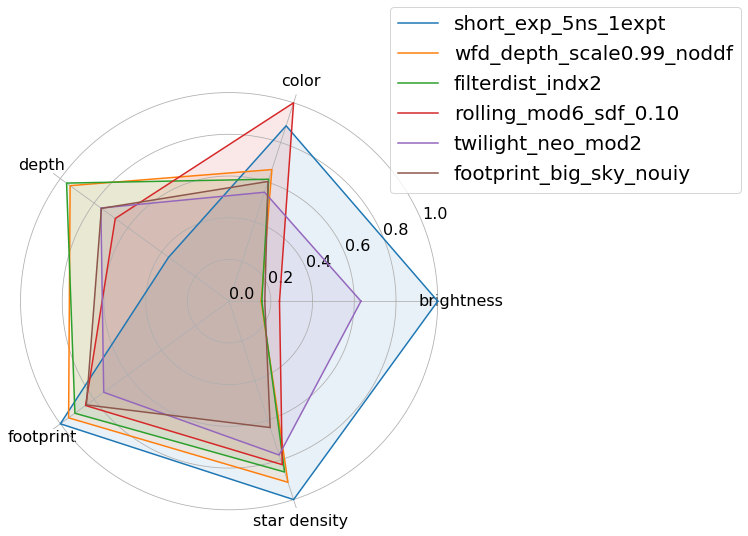

In [53]:
dbnames = [ #'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           #'twilight_neo_mod1_v1.5_10yrs',
           #'wfd_depth_scale0.99_v1.5_10yrs'
          'short_exp_5ns_1expt_v1.5_10yrs',
          'wfd_depth_scale0.99_noddf_v1.5_10yrs',
           #'bulges_bs_v1.5_10yrs',
           'filterdist_indx2_v1.5_10yrs',
           'rolling_mod6_sdf_0.10_v1.5_10yrs',
           'twilight_neo_mod2_v1.5_10yrs',
           'footprint_big_sky_nouiyv1.5_10yrs'  
          ]

FoMvars = ['FoM_tgaps_same', 'FoM_tgaps_diff', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]

#FoMvars = ['FoM_tgapsEvol', 'FoM_tgapsCol', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)

FoMvarsnames = ['brightness', "color", "depth", "footprint", "star density"]#,
ax.set_xticklabels(FoMvarsnames, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.2))

plt.savefig("figures/radar_wfd.pdf", bbox_inches='tight')

### parallel coord plot

In [18]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799'}


In [19]:
def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]

In [20]:
df_radar['family'] = df_radar.apply(get_family, axis=1)



In [21]:
df_radar.family.unique()

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype=object)

In [22]:
colorlist = [ family2color[i] for i in df_radar.family.values ]

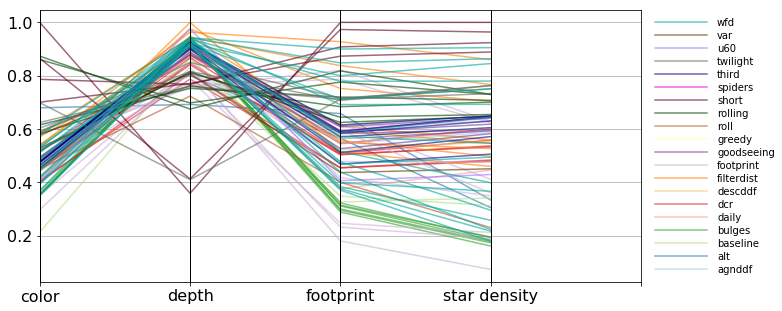

In [24]:
fig = plt.figure(figsize=(12,5))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal',]

ax = pd.plotting.parallel_coordinates(
    df_radar, "db", FoMvars, color=colorlist, alpha=0.6)

plt.xticks([0,1,2,3,4], labels=["color", "depth", "footprint", "star density"],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=0.6)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
#plt.savefig('figures/opsimParallelCoord.pdf')
